**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
suppressMessages(suppressWarnings(library("rtracklayer")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /data/reddylab/Kuei 
WORK DIRECTORY:     /data/reddylab/Kuei/out 
CODE DIRECTORY:     /data/reddylab/Kuei/code 
PATH OF SOURCE:     /data/reddylab/Kuei/source 
PATH OF EXECUTABLE: /data/reddylab/Kuei/bin 
PATH OF ANNOTATION: /data/reddylab/Kuei/annotation 
PATH OF PROJECT:    /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS:    /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 


**Check data**

In [3]:
fdiry = file.path(FD_RES, "results_v3", "region", "annotation_genehancer_ucsc_202301Jan")
print(dir(fdiry))

 [1] "edge_chrX.tsv"                                              
 [2] "geneHancerInteractions_hg38_chr11.tsv"                      
 [3] "geneHancerInteractions_hg38_chr8.tsv"                       
 [4] "geneHancerInteractions_hg38_chrX.tsv"                       
 [5] "geneHancerInteractionsDoubleElite_hg38_chr11.tsv"           
 [6] "geneHancerInteractionsDoubleElite_hg38_chr8.tsv"            
 [7] "geneHancerInteractionsDoubleElite_hg38_chrX.tsv"            
 [8] "geneHancerRegElements_hg38_chr11.bed"                       
 [9] "geneHancerRegElements_hg38_chr11.tsv"                       
[10] "geneHancerRegElements_hg38_chr8.bed"                        
[11] "geneHancerRegElements_hg38_chr8.tsv"                        
[12] "geneHancerRegElements_hg38_chrX.bed"                        
[13] "geneHancerRegElements_hg38_chrX.tsv"                        
[14] "geneHancerRegElements_hg38.bed"                             
[15] "geneHancerRegElementsDoubleElite_hg38_chr11.bed"        

## Import GeneHancer

In [4]:
###
fdiry = file.path(FD_RES, "results_v3", "region", "annotation_genehancer_ucsc_202301Jan")
fname = "geneHancerRegElements_hg38_chrX.tsv"
fpath = file.path(fdiry, fname)

###
dat = read_tsv(fpath, show_col_types = FALSE)
colnames(dat)[1:3] = c("Chrom", "Start", "End")

###
dat_ghancer_reg = dat
print(dim(dat))
head(dat)

[1] 5794   12


Chrom,Start,End,name,score,strand,thickStart,thickEnd,reserved,evidenceSources,elementType,eliteness
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chrX,13390,14928,GH0XJ000013,137,.,13390,14928,160160160,Ensembl,Enhancer,-
chrX,17474,20600,GH0XJ000017,99,.,17474,20600,160160160,Ensembl,Enhancer,-
chrX,94800,95400,GH0XJ000094,1,.,94800,95400,192192192,Ensembl,Enhancer,-
chrX,225927,227643,GH0XJ000225,1,.,225927,227643,192192192,Ensembl,Enhancer,-
chrX,230148,233000,GH0XJ000230,1,.,230148,233000,192192192,Ensembl,Enhancer,-
chrX,249800,251200,GH0XJ000249,82,.,249800,251200,160160160,Ensembl,Enhancer,-


In [5]:
###
fdiry = file.path(FD_RES, "results_v3", "region", "annotation_genehancer_ucsc_202301Jan")
fname = "geneHancerInteractions_hg38_chrX.tsv"
fpath = file.path(fdiry, fname)

###
dat = read_tsv(fpath, show_col_types = FALSE)
colnames(dat)[1:3] = c("Chrom", "Start", "End")

###
dat_ghancer_int = dat
print(dim(dat))
head(dat)

[1] 14260    18


Chrom,Start,End,name,score,value,geneAssociationMethods,color,geneHancerChrom,geneHancerStart,geneHancerEnd,geneHancerIdentifier,geneHancerStrand,geneChrom,geneStart,geneEnd,geneName,geneStrand
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
chrX,13390,253743,ENSG00000228572/GH0XJ000013,2,0.04,Distance,"77,190,238",chrX,13390,14928,GH0XJ000013,.,chrX,253742,253743,ENSG00000228572,+
chrX,17474,253743,ENSG00000228572/GH0XJ000017,2,0.04,Distance,"77,190,238",chrX,17474,20600,GH0XJ000017,.,chrX,253742,253743,ENSG00000228572,+
chrX,94800,253743,ENSG00000228572/GH0XJ000094,2,0.02,Distance,"77,190,238",chrX,94800,95400,GH0XJ000094,.,chrX,253742,253743,ENSG00000228572,+
chrX,225927,253743,ENSG00000228572/GH0XJ000225,2,0.06,Distance,"77,190,238",chrX,225927,227643,GH0XJ000225,.,chrX,253742,253743,ENSG00000228572,+
chrX,230148,253743,ENSG00000228572/GH0XJ000230,2,0.07,Distance,"77,190,238",chrX,230148,233000,GH0XJ000230,.,chrX,253742,253743,ENSG00000228572,+
chrX,249800,253743,ENSG00000228572/GH0XJ000249,2,0.34,Distance,"77,190,238",chrX,249800,251200,GH0XJ000249,.,chrX,253742,253743,ENSG00000228572,+


## Import peak annotation (GeneHancer)

In [6]:
###
fdiry = file.path(FD_RES, "results_v3", "region", "KS91_K562_ASTARRseq_peak_macs")
fname = "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.geneHancerRegElements_hg38.bed.gz"
fpath = file.path(fdiry, fname)

###
cnames = colnames(dat_ghancer_reg)
cnames = c("Chrom_Peak", "Start_Peak", "End_Peak", cnames, "Overlap")
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
#dat = dat %>% mutate(Peak = paste(Chrom, Start, End, sep="_"))

###
dat_peak_ant_ghancer = dat
print(dim(dat))
head(dat)

[1] 12513    16


Chrom_Peak,Start_Peak,End_Peak,Chrom,Start,End,name,score,strand,thickStart,thickEnd,reserved,evidenceSources,elementType,eliteness,Overlap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
chr11,191906,192504,chr11,191300,192770,GH11J000191,296,.,191300,192770,959595,"ENCODE(Z-Lab),Ensembl",Enhancer,Elite,598
chr11,206698,209020,chr11,205714,211708,GH11J000205,636,.,205714,211708,20400,"ENCODE(Z-Lab),EPDnew,Ensembl,dbSUPER",Promoter/Enhancer,Elite,2322
chr11,215373,216102,chr11,215128,218399,GH11J000215,140,.,215128,218399,160160160,dbSUPER,Enhancer,-,729
chr11,216448,216874,chr11,215128,218399,GH11J000215,140,.,215128,218399,160160160,dbSUPER,Enhancer,-,426
chr11,217600,218132,chr11,215128,218399,GH11J000215,140,.,215128,218399,160160160,dbSUPER,Enhancer,-,532
chr11,235755,237639,chr11,234782,238316,GH11J000234,632,.,234782,238316,20400,"ENCODE(Z-Lab),EPDnew,Ensembl,dbSUPER",Promoter/Enhancer,Elite,1884


## Import track of CRISPR

In [8]:
###
fdiry = file.path(FD_RES, "source", "CRISPRi_FlowFISH", "track_bigwig")
fname = "GATA1_HCRFF_rAVG.log2FC_2.bw"
fpath = file.path(fdiry, fname)

###
grg = import(fpath)
dat = data.frame(
    Chrom  = seqnames(grg),
    Start  = start(grg),
    End    = end(grg),
    Strand = strand(grg),
    Score  = grg$score
)

###
dat_track_hcrff_gata1 = dat
print(dim(dat))
head(dat)

[1] 13732     5


,Chrom,Start,End,Strand,Score
,<fct>,<int>,<int>,<fct>,<dbl>
1,chr12,54300768,54300768,*,-0.8867056
2,chr12,54300812,54300812,*,0.2450719
3,chr12,54301000,54301000,*,-0.4137884
4,chr12,54301043,54301043,*,-0.9177585
5,chr19,12887112,12887112,*,-0.4028910
6,chr19,12887180,12887180,*,-0.6069328


## Import track of ASTARR, WSTARR, TMPRA

In [9]:
ASSAY  = "KS91_K562_ASTARRseq"
FOLDER = "coverage"

### set file path
fdiry = file.path(FD_RES, "results_v3", ASSAY, FOLDER, "summary")
fname = "track.raw.Log2FC.GATA1.tsv"
fpath = file.path(fdiry, fname)

### import data
dat = read_tsv(fpath, show_col_types = FALSE)

dat_track_astarr = dat
print(dim(dat))
head(dat)

[1] 2095150       8


Chrom,Start,End,Input,Output,FC,Log2FC,pLog2FC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,47785501,47785502,0.008420745,0.009875188,1.172721,0.2298602,0.002079296
chrX,47785502,47785503,0.008420745,0.009875188,1.172721,0.2298602,0.002079296
chrX,47785503,47785504,0.008420745,0.009875188,1.172721,0.2298602,0.002079296
chrX,47785504,47785505,0.008420745,0.009875188,1.172721,0.2298602,0.002079296
chrX,47785505,47785506,0.008420745,0.009875188,1.172721,0.2298602,0.002079296
chrX,47785506,47785507,0.008420745,0.009875188,1.172721,0.2298602,0.002079296


In [10]:
ASSAY  = "A001_K562_WSTARRseq"
FOLDER = "coverage"

### set file path
fdiry = file.path(FD_RES, "results_v3", ASSAY, FOLDER, "summary")
fname = "track.raw.Log2FC.GATA1.tsv"
fpath = file.path(fdiry, fname)

### import data
dat = read_tsv(fpath, show_col_types = FALSE)

dat_track_wstarr = dat
print(dim(dat))
head(dat)

[1] 2095150       8


Chrom,Start,End,Input,Output,FC,Log2FC,pLog2FC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,47785501,47785502,0.03274721,0.02907323,0.8878077,-0.1716809,-0.00514152
chrX,47785502,47785503,0.03274721,0.02907323,0.8878077,-0.1716809,-0.00514152
chrX,47785503,47785504,0.03274721,0.02907323,0.8878077,-0.1716809,-0.00514152
chrX,47785504,47785505,0.03274721,0.02907323,0.8878077,-0.1716809,-0.00514152
chrX,47785505,47785506,0.03274721,0.02907323,0.8878077,-0.1716809,-0.00514152
chrX,47785506,47785507,0.03274721,0.02907323,0.8878077,-0.1716809,-0.00514152


In [11]:
ASSAY  = "Tewhey_K562_TileMPRA"
FOLDER = "coverage"

### set file path
fdiry = file.path(FD_RES, "results_v3", ASSAY, FOLDER, "summary")
fname = "track.norm.Log2FC.GATA1.tsv"
fpath = file.path(fdiry, fname)

### import data
dat = read_tsv(fpath, show_col_types = FALSE)

dat_track_tmpra = dat
print(dim(dat))
head(dat)

[1] 2095150       8


Chrom,Start,End,Input,Output,FC,Log2FC,pLog2FC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,47785501,47785502,1020.556,1858.489,1.821056,0.8647756,0.8641387
chrX,47785502,47785503,1020.556,1858.489,1.821056,0.8647756,0.8641387
chrX,47785503,47785504,1020.556,1858.489,1.821056,0.8647756,0.8641387
chrX,47785504,47785505,1020.556,1858.489,1.821056,0.8647756,0.8641387
chrX,47785505,47785506,1020.556,1858.489,1.821056,0.8647756,0.8641387
chrX,47785506,47785507,1020.556,1858.489,1.821056,0.8647756,0.8641387


## Import GATA1 binding sites

In [13]:
### set file path
fdiry = file.path(FD_RES, "results_v3", "region", "annotation_remap2022")
fname = "remap2022_K562_nr_macs2_hg38_v1_0.GATA1.tsv"
fpath = file.path(fdiry, fname)

### import data
dat = read_tsv(fpath, show_col_types = FALSE)

dat_remap_gata1 = dat
print(dim(dat))
head(dat)

[1] 104505     10


Chrom,Start,End,TF,Biotype,Score,Strand,thickStart_ReMap,thickStop_ReMap,Reserved
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
chr1,861820,861970,GATA1,"K-562,CD34",4,.,861892,861893,2522828
chr1,911271,911453,GATA1,"K-562,HUDEP-2,erythroblast,CD34",7,.,911374,911375,2522828
chr1,916603,916888,GATA1,"K-562,erythroid-progenitor,erythroblast",4,.,916711,916712,2522828
chr1,918759,918943,GATA1,K-562,1,.,918887,918888,2522828
chr1,923546,923711,GATA1,K-562,1,.,923600,923601,2522828
chr1,936612,936808,GATA1,K-562,1,.,936650,936651,2522828


## Import Open chromatin peaks

In [14]:
### set file path
fdiry = file.path(FD_RES, "results_v3", "region", "KS91_K562_ASTARRseq_peak_macs")
fname = "KS91_K562_hg38_ASTARRseq_Input.peaks.MYC.FADS.GATA1.tsv"
fpath = file.path(fdiry, fname)

### import data
dat = read_tsv(fpath, show_col_types = FALSE)

###
dat_peak = dat
print(dim(dat_peak))
head(dat)

[1] 417   5


Chrom,Start,End,Peak,Region
<chr>,<dbl>,<dbl>,<chr>,<chr>
chr8,126778902,126779728,chr8_126778902_126779728,MYC
chr8,126782925,126783318,chr8_126782925_126783318,MYC
chr8,126804776,126805825,chr8_126804776_126805825,MYC
chr8,126817018,126817490,chr8_126817018_126817490,MYC
chr8,126820465,126821393,chr8_126820465_126821393,MYC
chr8,126824093,126824987,chr8_126824093_126824987,MYC


## Extract GHancer that interact with GATA1

In [15]:
dat = dat_ghancer_int
dat = dat %>% dplyr::filter(geneName == "GATA1") %>% arrange(Start)
print(dim(dat))
dat

[1]  7 18


Chrom,Start,End,name,score,value,geneAssociationMethods,color,geneHancerChrom,geneHancerStart,geneHancerEnd,geneHancerIdentifier,geneHancerStrand,geneChrom,geneStart,geneEnd,geneName,geneStrand
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
chrX,48776467,48786554,GATA1/GH0XJ048776,2,0.26,Distance,"126,47,142",chrX,48776467,48777731,GH0XJ048776,.,chrX,48786553,48786554,GATA1,+
chrX,48782533,48786554,GATA1/GH0XJ048782,2,0.83,Distance,"126,47,142",chrX,48782533,48783734,GH0XJ048782,.,chrX,48786553,48786554,GATA1,+
chrX,48785470,48788954,GATA1/GH0XJ048785,491,1205.94,"eRNA_co-expression,Distance","126,47,142",chrX,48785470,48788954,GH0XJ048785,.,chrX,48786553,48786554,GATA1,+
chrX,48786553,49157200,GATA1/GH0XJ049154,3,2.64,eRNA_co-expression,"126,47,142",chrX,49154560,49157200,GH0XJ049154,.,chrX,48786553,48786554,GATA1,+
chrX,48786553,48798889,GATA1/GH0XJ048798,2,0.14,Distance,"126,47,142",chrX,48798200,48798889,GH0XJ048798,.,chrX,48786553,48786554,GATA1,+
chrX,48786553,48796322,GATA1/GH0XJ048793,2,0.53,Distance,"126,47,142",chrX,48793761,48796322,GH0XJ048793,.,chrX,48786553,48786554,GATA1,+
chrX,48786553,48789998,GATA1/GH0XJ048789,9,17.84,"eRNA_co-expression,Distance","126,47,142",chrX,48789530,48789998,GH0XJ048789,.,chrX,48786553,48786554,GATA1,+


In [16]:
idx = dat$geneHancerIdentifier
dat = dat_ghancer_reg %>% dplyr::filter(name %in% idx)
print(dim(dat))
dat

[1]  7 12


Chrom,Start,End,name,score,strand,thickStart,thickEnd,reserved,evidenceSources,elementType,eliteness
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chrX,48776467,48777731,GH0XJ048776,130,.,48776467,48777731,160160160,dbSUPER,Enhancer,-
chrX,48782533,48783734,GH0XJ048782,283,.,48782533,48783734,959595,"ENCODE(Z-Lab),dbSUPER",Enhancer,Elite
chrX,48785470,48788954,GH0XJ048785,506,.,48785470,48788954,2555151,"ENCODE(Z-Lab),EPDnew,FANTOM5,dbSUPER",Promoter/Enhancer,Elite
chrX,48789530,48789998,GH0XJ048789,256,.,48789530,48789998,959595,"ENCODE(Z-Lab),FANTOM5,dbSUPER",Enhancer,Elite
chrX,48793761,48796322,GH0XJ048793,328,.,48793761,48796322,959595,"ENCODE(Z-Lab),Ensembl,dbSUPER",Enhancer,Elite
chrX,48798200,48798889,GH0XJ048798,56,.,48798200,48798889,192192192,dbSUPER,Enhancer,-
chrX,49154560,49157200,GH0XJ049154,442,.,49154560,49157200,959595,"ENCODE(Z-Lab),Ensembl,FANTOM5,dbSUPER",Enhancer,Elite


## Plot

In [17]:
### chrX:48780000-48810000
CHROM = "chrX"
START = 48775000
END   = 48810000

### GeneHancer
dat = dat_ghancer_int
dat = dat %>% dplyr::filter(geneName == "GATA1")
idx = dat$geneHancerIdentifier

dat = dat_ghancer_reg
dat = dat %>% dplyr::filter(Chrom == CHROM, Start >= START, End <= END, name %in% idx)
dat_ant_enh = dat

### TF binding sites
dat = dat_remap_gata1 
dat = dat %>% dplyr::filter(Chrom == CHROM, Start >= START, End <= END)
dat_ant_remap = dat

### Open chromatin regions
dat = dat_peak 
dat = dat %>% dplyr::filter(Chrom == CHROM, Start >= START, End <= END)
dat_ant_open = dat

### CRISPR
dat = dat_track_hcrff_gata1
dat = dat %>% dplyr::filter(Chrom == CHROM, Start >= START, End <= END)
dat_track_hcrff = dat 

In [21]:
###
lst_dat = list(
    "ATAC-seq" = dat_track_astarr %>% mutate(Coverage = Input),
    "ASTARR"   = dat_track_astarr %>% mutate(Coverage = pLog2FC),
    "WSTARR"   = dat_track_wstarr %>% mutate(Coverage = pLog2FC),
    "TMPRA"    = dat_track_tmpra  %>% mutate(Coverage =  Log2FC)
)

###
lst_dat = lapply(lst_dat, function(dat){
    dat = dat %>% dplyr::filter(Chrom == CHROM, Start >= START, End <= END)
    return(dat)
})

###
lst_gpt = lapply(names(lst_dat), function(idx){
    txt = idx
    dat = lst_dat[[idx]]
    gpt = ggplot() + 
        geom_hline(yintercept = 0, color="grey50") +    
        geom_line(data = dat, aes(x=Start, y=Coverage), linewidth=1) +
        labs(x="", title=txt) +
        theme_cowplot()
    
    gpt = gpt + geom_rect(
        data = dat_ant_open,
        aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
        fill = "grey50",
        alpha=0.5)
    
    gpt = gpt + geom_rect(
        data = dat_ant_remap,
        aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
        fill = "red",
        alpha=0.5)
    
    return(gpt)
})

### CRISPR
gpt = ggplot() + 
    geom_hline(yintercept = 0, color="grey50") + 
    geom_segment(data=dat, aes(x=Start, xend=Start, y=0, yend=Score)) +
    labs(x="", y="Score", title="CRISPR (HCRFF; GATA1)") +
    theme_cowplot()
lst_gpt = append(list(gpt), lst_gpt)

### 
lst_gpt = lapply(lst_gpt, function(gpt){
    gpt = gpt + geom_vline(xintercept = seq(START, END, 5000), color="grey80")
    return(gpt)
})

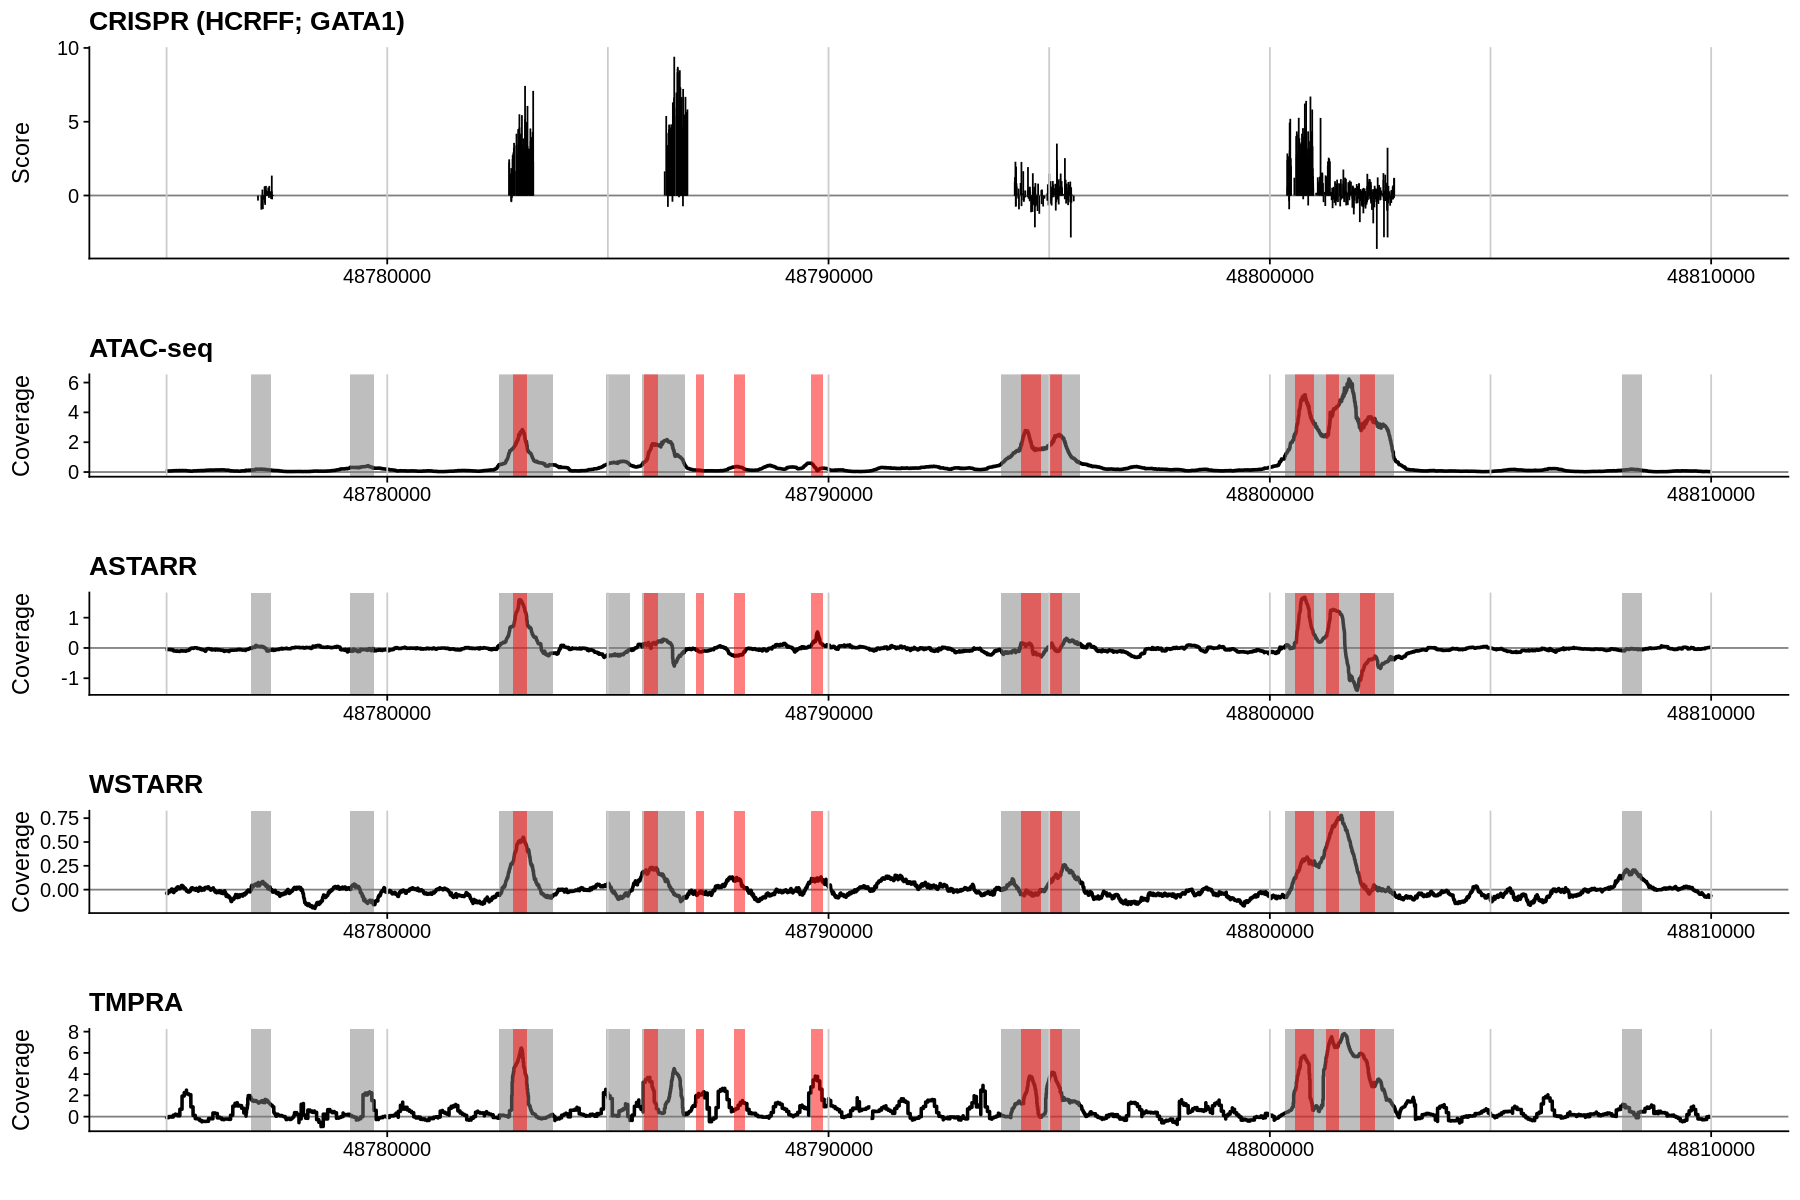

In [22]:
options(repr.plot.height=10, repr.plot.width=15)
plot_grid(plotlist = lst_gpt, 
          ncol=1, 
          align = "v",
          rel_heights = c(3, 2, 2, 2, 2))

In [18]:
###
lst_dat = list(
    "ATAC-seq" = dat_track_astarr %>% mutate(Coverage = Input),
    "ASTARR"   = dat_track_astarr %>% mutate(Coverage = pLog2FC),
    "WSTARR"   = dat_track_wstarr %>% mutate(Coverage = pLog2FC),
    "TMPRA"    = dat_track_tmpra  %>% mutate(Coverage =  Log2FC)
)

###
lst_dat = lapply(lst_dat, function(dat){
    dat = dat %>% dplyr::filter(Chrom == CHROM, Start >= START, End <= END)
    return(dat)
})

###
lst_gpt = lapply(names(lst_dat), function(idx){
    txt = idx
    dat = lst_dat[[idx]]
    gpt = ggplot() + 
        geom_hline(yintercept = 0, color="grey50") +    
        geom_line(data = dat, aes(x=Start, y=Coverage), linewidth=1) +
        labs(x="", title=txt) +
        theme_cowplot()
    
    gpt = gpt + geom_rect(
        data = dat_ant_enh,
        aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
        fill = "forest green",
        alpha=0.5)
    
    gpt = gpt + geom_rect(
        data = dat_ant_open,
        aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
        fill = "grey50",
        alpha=0.5)
    
    gpt = gpt + geom_rect(
        data = dat_ant_remap,
        aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
        fill = "red",
        alpha=0.5)
    
    return(gpt)
})

### CRISPR
gpt = ggplot() + 
    geom_hline(yintercept = 0, color="grey50") + 
    geom_segment(data=dat, aes(x=Start, xend=Start, y=0, yend=Score)) +
    labs(x="", y="Score", title="CRISPR (HCRFF; GATA1)") +
    theme_cowplot()
lst_gpt = append(list(gpt), lst_gpt)

### 
lst_gpt = lapply(lst_gpt, function(gpt){
    gpt = gpt + geom_vline(xintercept = seq(START, END, 5000), color="grey80")
    return(gpt)
})
### Enhancer and binding sites
#gpt = ggplot() +
#    geom_hline(yintercept = c(0, 1, 2), color="grey50") +
#    geom_rect(
#        data = dat_ant_enh,
#        aes(xmin=Start, xmax=End, ymin=0, ymax=1),
#        fill = "forest green",
#        alpha=0.7) + 
#    geom_rect(
#        data = dat_ant_remap,
#        aes(xmin=Start, xmax=End, ymin=1, ymax=2),
#        fill = "red",
#        alpha=0.5) +
#    ylim(0, 2) +
#    scale_y_continuous(breaks=NULL) +
#    theme_cowplot()
    #scale_y_continuous(
    #    breaks = c(0.5, 1.5),
    #    labels = c("Enhancer\n(GATA1 Associated)", "TF-Binding\n(GATA1)")
    #) +
    #theme(axis.text.y = element_text(face="bold", vjust = 1, hjust=0.5, size=14, angle=90))
#lst_gpt = append(list(gpt), lst_gpt)

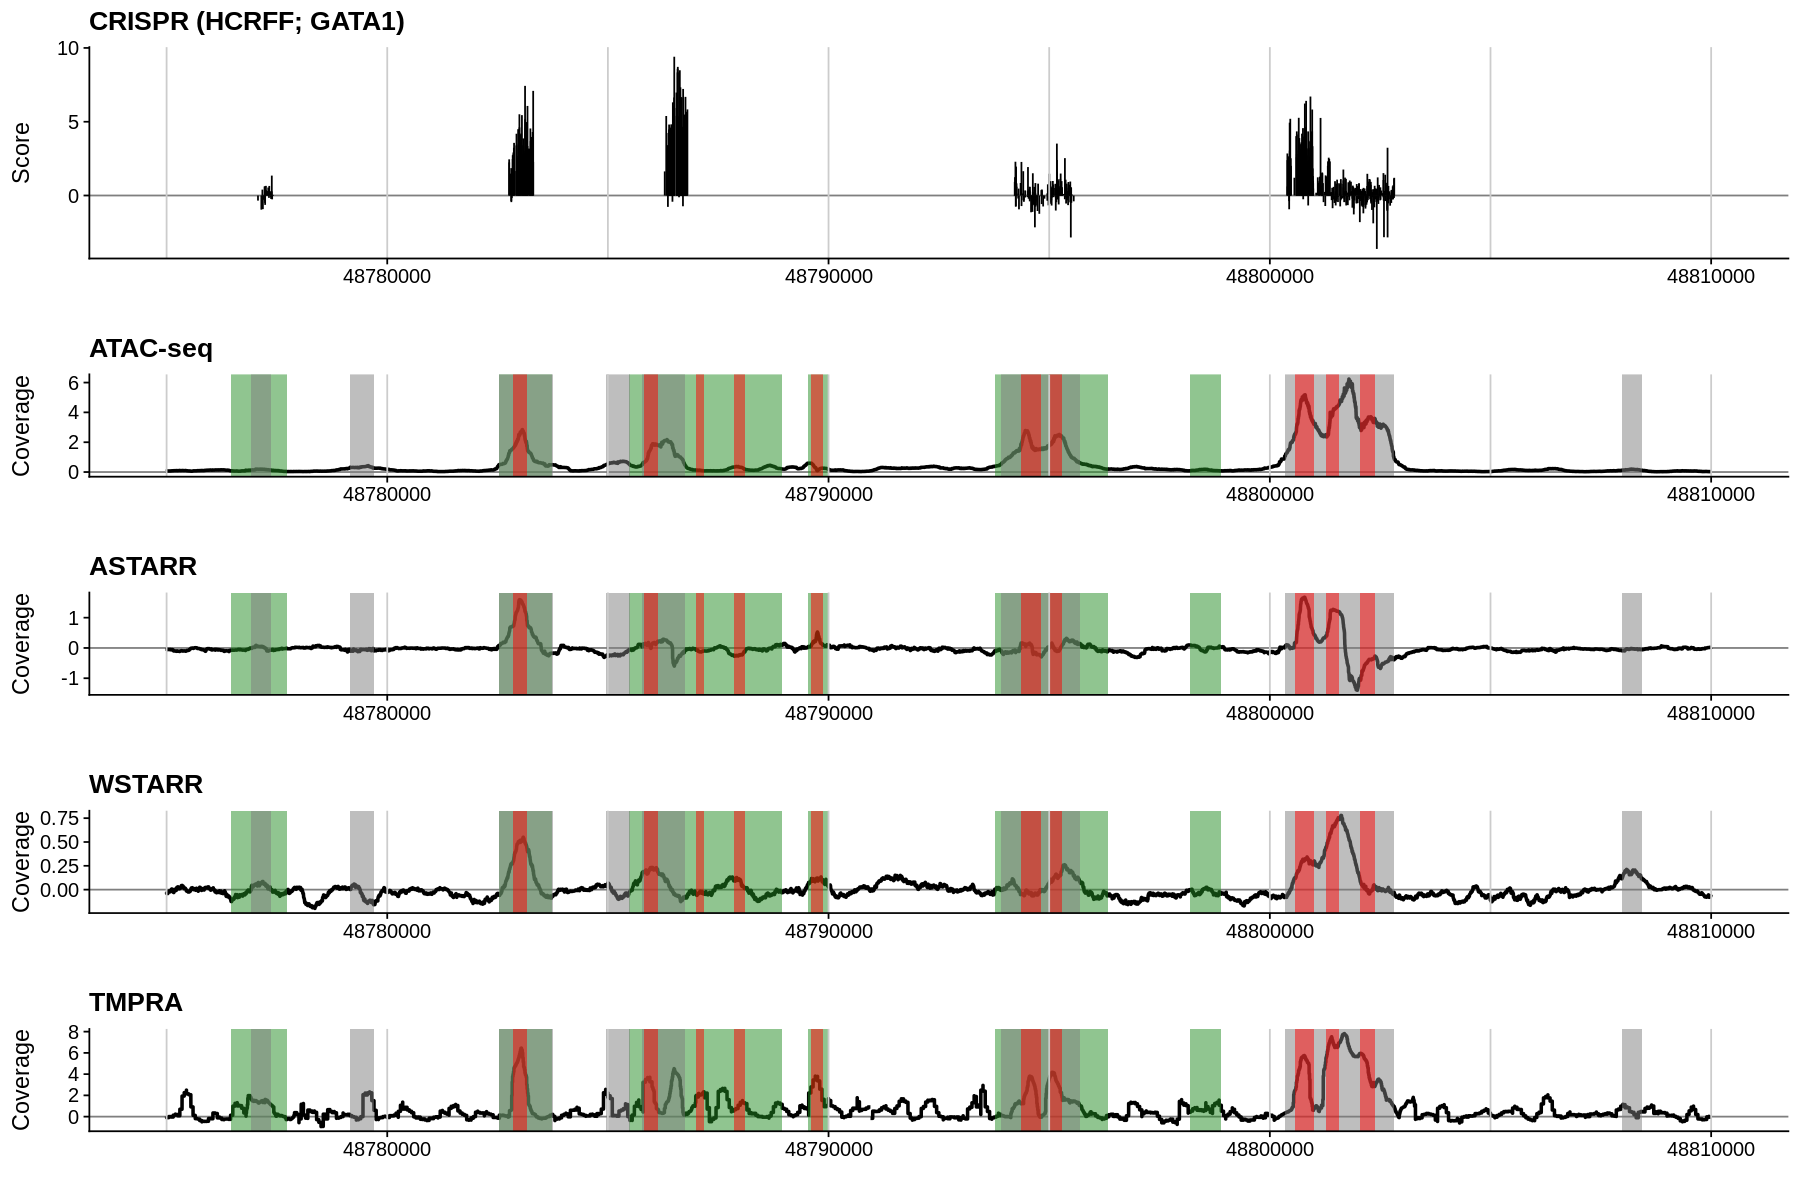

In [19]:
options(repr.plot.height=10, repr.plot.width=15)
plot_grid(plotlist = lst_gpt, 
          ncol=1, 
          align = "v",
          rel_heights = c(3, 2, 2, 2, 2))

In [27]:
### 49155029 - 49156747
CHROM = "chrX"
START = 49150000
END   = 49160000
#START = 49154500
#END   = 49157500

### GeneHancer
dat = dat_ghancer_int
dat = dat %>% dplyr::filter(geneName == "GATA1")
idx = dat$geneHancerIdentifier

dat = dat_ghancer_reg
dat = dat %>% dplyr::filter(Chrom == CHROM, Start >= START, End <= END, name %in% idx)
dat_ant_enh = dat

### TF binding sites
dat = dat_remap_gata1 
dat = dat %>% dplyr::filter(Chrom == CHROM, Start >= START, End <= END)
dat_ant_remap = dat

### Open chromatin regions
dat = dat_peak 
dat = dat %>% dplyr::filter(Chrom == CHROM, Start >= START, End <= END)
dat_ant_open = dat

### CRISPR
dat = dat_track_hcrff_gata1
dat = dat %>% dplyr::filter(Chrom == CHROM, Start >= START, End <= END)
dat_track_hcrff = dat 

In [28]:
###
lst_dat = list(
    "ATAC-seq" = dat_track_astarr %>% mutate(Coverage = Input),
    "ASTARR"   = dat_track_astarr %>% mutate(Coverage = pLog2FC),
    "WSTARR"   = dat_track_wstarr %>% mutate(Coverage = pLog2FC),
    "TMPRA"    = dat_track_tmpra  %>% mutate(Coverage =  Log2FC)
)

###
lst_dat = lapply(lst_dat, function(dat){
    dat = dat %>% dplyr::filter(Chrom == CHROM, Start >= START, End <= END)
    return(dat)
})

###
lst_gpt = lapply(names(lst_dat), function(idx){
    txt = idx
    dat = lst_dat[[idx]]
    gpt = ggplot() + 
        geom_hline(yintercept = 0, color="grey50") +    
        geom_line(data = dat, aes(x=Start, y=Coverage), linewidth=1) +
        labs(x="", title=txt) +
        theme_cowplot()
    
    gpt = gpt + geom_rect(
        data = dat_ant_enh,
        aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
        fill = "forest green",
        alpha=0.7)
    
    gpt = gpt + geom_rect(
        data = dat_ant_open,
        aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
        fill = "grey50",
        alpha=0.7)
    
    gpt = gpt + geom_rect(
        data = dat_ant_remap,
        aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
        fill = "red",
        alpha=0.5)
    
    return(gpt)
})

### adjust
lst_gpt[[1]] = lst_gpt[[1]] + ylim(0, 6.25)
lst_gpt[[2]] = lst_gpt[[2]] + ylim(-1.40, 1.68)
lst_gpt[[3]] = lst_gpt[[3]] + ylim(-0.20, 0.78)
lst_gpt[[4]] = lst_gpt[[4]] + ylim(-0.95, 7.82)

### CRISPR
gpt = ggplot() + 
    geom_hline(yintercept = 0, color="grey50") + 
    geom_segment(data=dat, aes(x=Start, xend=Start, y=0, yend=Score)) +
    ylim(-3, 10) +
    labs(x="", y="Score", title="CRISPR (HCRFF; GATA1)") +
    theme_cowplot()

lst_gpt = append(list(gpt), lst_gpt)


### 
lst_gpt = lapply(lst_gpt, function(gpt){
    gpt = gpt + geom_vline(xintercept = seq(START, END, 5000), color="grey80")
    return(gpt)
})

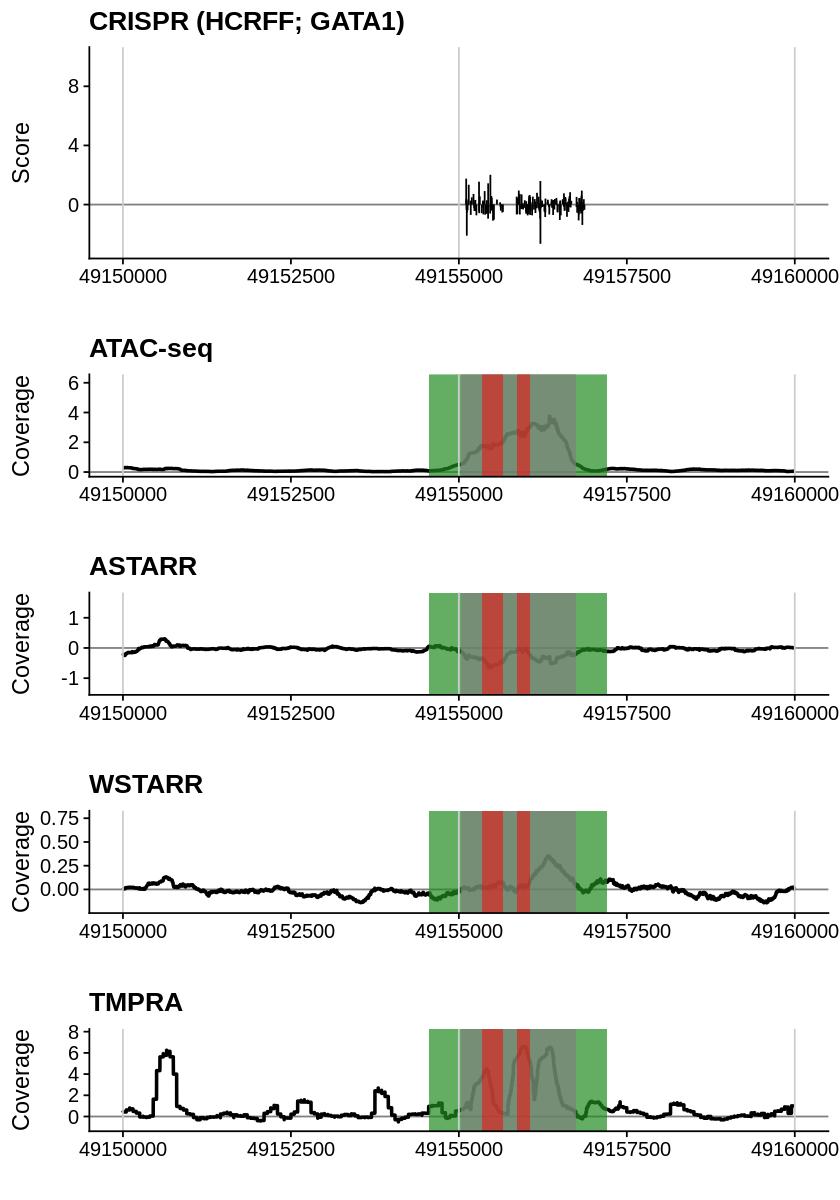

In [29]:
options(repr.plot.height=10, repr.plot.width=7)
plot_grid(plotlist = lst_gpt, 
          ncol=1, 
          align = "v",
          rel_heights = c(3, 2, 2, 2, 2))